# Single Modality Analysis of Mouse Thymus Dataset

## Loading Packages

In [ ]:
import warnings
warnings.filterwarnings('ignore')
## Loading package
import os

import scanpy as sc
import matplotlib.pyplot as plt
import numpy as np

# the location of R (used for the mclust clustering)
os.environ['R_HOME'] = 'E:/R-4.3.1'
os.environ['R_USER'] = 'E:/anaconda/lib/site-packages/rpy2'

save_path = 'D:/study/learning/spatial_transcriptome/papers/spatial_multi_omics-main/Results/Visualization/Mouse_Thymus/' 

import sys
sys.path.insert(0, 'D:/study/learning/spatial_transcriptome/papers/spatial_multi_omics-main/Model/')
from preprocess import preprocessing
from utils import mclust_R

## Loading and Preprocessing Data

In [ ]:
file_fold_1 = 'D:/study/learning/spatial_transcriptome/papers/spatial_multi_omics-main/data/Mouse_Thymus_1/'
file_fold_2 = 'D:/study/learning/spatial_transcriptome/papers/spatial_multi_omics-main/data/Mouse_Thymus_2/'
file_fold_3 = 'D:/study/learning/spatial_transcriptome/papers/spatial_multi_omics-main/data/Mouse_Thymus_3/'

adata_omics_1_1 = sc.read_h5ad(file_fold_1 + 'adata_RNA.h5ad')
adata_omics_1_2 = sc.read_h5ad(file_fold_1 + 'adata_ADT.h5ad')

adata_omics_2_1 = sc.read_h5ad(file_fold_2 + 'adata_RNA.h5ad')
adata_omics_2_2 = sc.read_h5ad(file_fold_2 + 'adata_ADT.h5ad')

adata_omics_3_1 = sc.read_h5ad(file_fold_3 + 'adata_RNA.h5ad')
adata_omics_3_2 = sc.read_h5ad(file_fold_3 + 'adata_ADT.h5ad')

adata_omics_1_1.var_names_make_unique()
adata_omics_1_2.var_names_make_unique()
adata_omics_2_1.var_names_make_unique()
adata_omics_2_2.var_names_make_unique()
adata_omics_3_1.var_names_make_unique()
adata_omics_3_2.var_names_make_unique()

adata_omics_1_1, adata_omics_1_2 = preprocessing(adata_omics_1_1, adata_omics_1_2, 'Stereo-CITE-seq')
adata_omics_2_1, adata_omics_2_2 = preprocessing(adata_omics_2_1, adata_omics_2_2, 'Stereo-CITE-seq')
adata_omics_3_1, adata_omics_3_2 = preprocessing(adata_omics_3_1, adata_omics_3_2, 'Stereo-CITE-seq')

Stereo-CITE-seq data preprocessing have done!
Dimensions after preprocessed adata_modal_1: (4183, 3000)
Dimensions after preprocessing adata_modal_2: (4183, 19)
Stereo-CITE-seq data preprocessing have done!
Dimensions after preprocessed adata_modal_1: (4573, 3000)
Dimensions after preprocessing adata_modal_2: (4573, 19)
Stereo-CITE-seq data preprocessing have done!
Dimensions after preprocessed adata_modal_1: (4147, 3000)
Dimensions after preprocessing adata_modal_2: (4147, 19)


In [ ]:
adata_RNA_analysis = adata_omics_3_1
adata_Protein_analysis = adata_omics_3_2

In [ ]:
## Running PCA on RNA modality
sc.pp.pca(adata_RNA_analysis, n_comps=adata_Protein_analysis.shape[1]-1)
sc.pp.neighbors(adata_RNA_analysis, use_rep='X_pca')
sc.tl.umap(adata_RNA_analysis)
mclust_R(adata_RNA_analysis, used_obsm='X_pca', num_cluster=7)

## Running PCA on Protein modality
sc.pp.pca(adata_Protein_analysis, n_comps=adata_Protein_analysis.shape[1]-1)
sc.pp.neighbors(adata_Protein_analysis, use_rep='X_pca')
sc.tl.umap(adata_Protein_analysis)
mclust_R(adata_Protein_analysis, used_obsm='X_pca', num_cluster=7)

fitting ...
  |======================================================================| 100%
fitting ...
  |======================================================================| 100%


AnnData object with n_obs × n_vars = 4147 × 19
    obs: 'orig.ident', 'x', 'y', 'clusters_mclust'
    var: 'n_cells'
    uns: 'INR', 'pca', 'neighbors', 'umap'
    obsm: 'spatial', 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

## Storing the Results

In [79]:
results = sc.read_h5ad('D:/study/learning/spatial_transcriptome/papers/spatial_multi_omics-main/Results/Mouse_Thymus_Replicate3.h5ad')
results

AnnData object with n_obs × n_vars = 4147 × 0
    obs: 'SpaKnit', 'SpatialGlue', 'STAGATE', 'Modality1', 'Modality2'
    obsm: 'Modality1', 'Modality2', 'STAGATE', 'SpaKnit', 'SpatialGlue', 'spatial'

In [73]:
results.obs['Modality1'] = adata_RNA_analysis.obs['clusters_mclust'].values
results.obsm['Modality1'] = adata_RNA_analysis.obsm['X_pca']
results.obs['Modality2'] = adata_Protein_analysis.obs['clusters_mclust'].values
results.obsm['Modality2'] = adata_Protein_analysis.obsm['X_pca']
results.write_h5ad('D:/study/learning/spatial_transcriptome/papers/spatial_multi_omics-main/Results/Mouse_Thymus_Replicate3.h5ad')

## Visualization

In [ ]:
colors = [
    '#2a9d8f', '#ee6055', '#fdf0d5', '#83c5be', '#99582a', '#f9c74f',  '#264653'
]

fig,ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 6))
sc.pl.embedding(adata_Protein_analysis, basis='spatial', color='clusters_mclust', ax=ax, s=100, show=False, palette=colors)
ax.invert_yaxis()
ax.set_title(f'')
ax.set_xlabel('')
ax.set_ylabel('')
# remove legend
ax.get_legend().remove()
for spine in ax.spines.values():
    spine.set_visible(False)
plt.tight_layout()

In [234]:
# # mapping = {1: 1, 2: 4, 3: 5, 4: 3, 5: 6, 6: 2}
# # adata_RNA_analysis.obs['clusters_mclust'] = adata_RNA_analysis.obs['clusters_mclust'].map(mapping)
# mapping = {1: 5, 2: 3, 3: 4, 4: 2, 5: 1, 6: 6}
# adata_Protein_analysis.obs['clusters_mclust'] = adata_Protein_analysis.obs['clusters_mclust'].map(mapping)

In [ ]:
# RNA umap visualization
plt.rcParams['font.size'] = 20
plt.rcParams['font.sans-serif'] = 'Arial'
fig, ax = plt.subplots(1,1, figsize=(6,6))

sc.pl.umap(adata_RNA_analysis, color='clusters_mclust', ax=ax,legend_loc='on data',legend_fontoutline=5, show=False)
ax.set_title('')
# remove x, y axis
ax.set_xlabel('')
ax.set_ylabel('')

# plt.savefig(save_path + 'thymus3_RNA_umap.png', bbox_inches='tight', dpi=500)
# plt.savefig(save_path + 'thymus3_RNA_umap.eps', bbox_inches='tight', dpi=500)

In [ ]:
# # RNA PAGA
plt.rcParams['font.size'] = 20
plt.rcParams['font.sans-serif'] = 'Arial'
fig, ax = plt.subplots(1,1, figsize=(6,6))
sc.tl.paga(adata_RNA_analysis, groups='clusters_mclust')
sc.pl.paga(adata_RNA_analysis, edge_width_scale=1, node_size_scale=5, ax=ax, show=False, threshold=0.1, fontoutline=3)
# ax.set_title('PAGA graph')
# remove x, y axis
ax.set_xlabel('')
ax.set_ylabel('')

# plt.savefig(save_path + 'thymus3_RNA_PAGA.png', bbox_inches='tight', dpi=500)
# plt.savefig(save_path + 'thymus3_RNA_PAGA.eps', bbox_inches='tight', dpi=500)

In [ ]:
plt.rcParams['font.size'] = 20
plt.rcParams['font.sans-serif'] = 'Arial'
fig, ax = plt.subplots(1,1, figsize=(6,6))

sc.pl.umap(adata_Protein_analysis, color='clusters_mclust', ax=ax,legend_loc='on data',legend_fontoutline=5, show=False)
ax.set_title('')
# remove x, y axis
ax.set_xlabel('')
ax.set_ylabel('')

# plt.savefig(save_path + 'thymus3_Protein_umap.png', bbox_inches='tight', dpi=500)
# plt.savefig(save_path + 'thymus3_Protein_umap.eps', bbox_inches='tight', dpi=500)

In [ ]:
plt.rcParams['font.size'] = 20
plt.rcParams['font.sans-serif'] = 'Arial'
fig, ax = plt.subplots(1,1, figsize=(6,6))
sc.tl.paga(adata_Protein_analysis, groups='clusters_mclust')
sc.pl.paga(adata_Protein_analysis, edge_width_scale=3, node_size_scale=5, ax=ax, show=False, threshold=0.1, fontoutline=3)
ax.set_title('')
# remove x, y axis
ax.set_xlabel('')
ax.set_ylabel('')

# plt.savefig(save_path + 'thymus3_Protein_PAGA.png', bbox_inches='tight', dpi=500)
# plt.savefig(save_path + 'thymus3_Protein_PAGA.eps', bbox_inches='tight', dpi=500)

In [ ]:
## sc.tl.rank_genes_groups: Genes are ranked to determine population characteristics
sc.tl.rank_genes_groups(adata_RNA_analysis, 'clusters_mclust', method="t-test")
rank_genes = sc.get.rank_genes_groups_df(adata_RNA_analysis, group=None)
rank_genes.to_excel(save_path + 'marker_genes.xlsx', index=True)

In [ ]:
plt.rcParams['font.size'] = 18
plt.rcParams['font.sans-serif'] = 'Arial'
fig, ax = plt.subplots(1,6, figsize=(24,4))
fig.subplots_adjust(wspace=0.1, hspace=0)
marker_genes = ['Themis', 'Rag1', 'Tmsb4x', 'Rag1', 'H2-K1', 'Gm26917']
# marker_genes = ['Cdk8', 'Rag1', 'Gm26917', 'Prss16', 'Arpp21', 'H2-K1']
# marker_genes = ['Cdk8', 'Apoe', 'H2-K1', 'Rag1', 'Cdk8', 'Rag1']
components_range =range(6)
for i in components_range:

    sc.pl.spatial(adata_omics_1_1, img_key=None, color=marker_genes[i], spot_size=100, show=False, ax=ax[i], colorbar_loc=None, cmap='coolwarm')
    # remove x, y axis
    ax[i].set_xlabel('')
    ax[i].set_ylabel('')
    ax[i].set_aspect(1.55)
# plt.savefig(save_path + 'thymus1_Marker.png', bbox_inches='tight', dpi=500)
# plt.savefig(save_path + 'thymus1_Marker.eps', bbox_inches='tight', dpi=500)
plt.show()

In [ ]:
plt.rcParams['font.size'] = 16
plt.rcParams['font.sans-serif'] = 'Arial'
fig, ax = plt.subplots(1,1, figsize=(10,8))
ax = sc.pl.stacked_violin(adata_RNA_analysis, marker_genes, groupby='clusters_mclust', figsize=(15,8), ax=ax,dendrogram=True, show=False)
# plt.savefig(save_path + 'thymus3_Marker_violin.png', bbox_inches='tight', dpi=500)
# plt.savefig(save_path + 'thymus3_Marker_violin.eps', bbox_inches='tight', dpi=500)
plt.show()

In [ ]:
# adata_RNA_analysis.write_h5ad(save_path + 'thymus3_RNA_Results.h5ad')
# adata_Protein_analysis.write_h5ad(save_path + 'thymus3_Protein_Results.h5ad')

## Batch Effect Analysis

In [255]:
adata_RNA_modality_1 = sc.read_h5ad(save_path + '/Data/thymus1_RNA_Results.h5ad')
adata_RNA_modality_2 = sc.read_h5ad(save_path + '/Data/thymus2_RNA_Results.h5ad')
adata_RNA_modality_3 = sc.read_h5ad(save_path + '/Data/thymus3_RNA_Results.h5ad')

adata_Protein_modality_1 = sc.read_h5ad(save_path + '/Data/thymus1_Protein_Results.h5ad')
adata_Protein_modality_2 = sc.read_h5ad(save_path + '/Data/thymus2_Protein_Results.h5ad')
adata_Protein_modality_3 = sc.read_h5ad(save_path + '/Data/thymus3_Protein_Results.h5ad')

In [256]:
adata_RNA_all = sc.concat({'1': adata_RNA_modality_1, '2': adata_RNA_modality_2, '3': adata_RNA_modality_3}, label='batch')
adata_ADT_all = sc.concat({'1': adata_Protein_modality_1, '2': adata_Protein_modality_2, '3': adata_Protein_modality_3}, label='batch')

In [ ]:
## umap-RNA
fig,ax = plt.subplots(nrows=2, ncols=4, figsize=(30, 15))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=None)
batch = ['batch1', 'batch2', 'batch3']

# RNA_1
data_RNA = adata_RNA_all[adata_RNA_all.obs['batch']==batch[0]]
# 绘制第一组数据的 UMAP 图
sc.pl.umap(data_RNA, color=['batch'], ax=ax[0][0], show=False)
ax[0][0].set_title('UMAP - data_RNA_1, Batch')
sc.pl.umap(data_RNA, color=['clusters_mclust'], ax=ax[0][1], show=False)
ax[0][1].set_title('UMAP - data_RNA_1, clusters_leiden')

# RNA_2
data_RNA = adata_RNA_all[adata_RNA_all.obs['batch']==batch[1]]
# 绘制第一组数据的 UMAP 图
sc.pl.umap(data_RNA, color=['batch'], ax=ax[0][2], show=False)
ax[0][2].set_title('UMAP - data_RNA_2, Batch')
sc.pl.umap(data_RNA, color=['clusters_mclust'], ax=ax[0][3], show=False)
ax[0][3].set_title('UMAP - data_RNA_2, clusters_leiden')

# RNA_3
data_RNA = adata_RNA_all[adata_RNA_all.obs['batch']==batch[2]]
# 绘制第一组数据的 UMAP 图
sc.pl.umap(data_RNA, color=['batch'], ax=ax[1][0], show=False)
ax[1][0].set_title('UMAP - data_RNA_3, Batch')
sc.pl.umap(data_RNA, color=['clusters_mclust'], ax=ax[1][1], show=False)
ax[1][1].set_title('UMAP - data_RNA_3, clusters_leiden')

## umap_all
sc.pl.umap(adata_RNA_all, color=['batch'], ax=ax[1][2], show=False)
ax[1][2].set_title('UMAP - data_RNA_all, Batch')
sc.pl.umap(adata_RNA_all, color=['clusters_mclust'], ax=ax[1][3], show=False)
ax[1][3].set_title('UMAP - data_RNA_all, clusters_leiden')

plt.tight_layout()
fig.show()

In [257]:
sc.pp.neighbors(adata_RNA_all)
sc.tl.umap(adata_RNA_all)

In [259]:
sc.pp.neighbors(adata_ADT_all)
sc.tl.umap(adata_ADT_all)

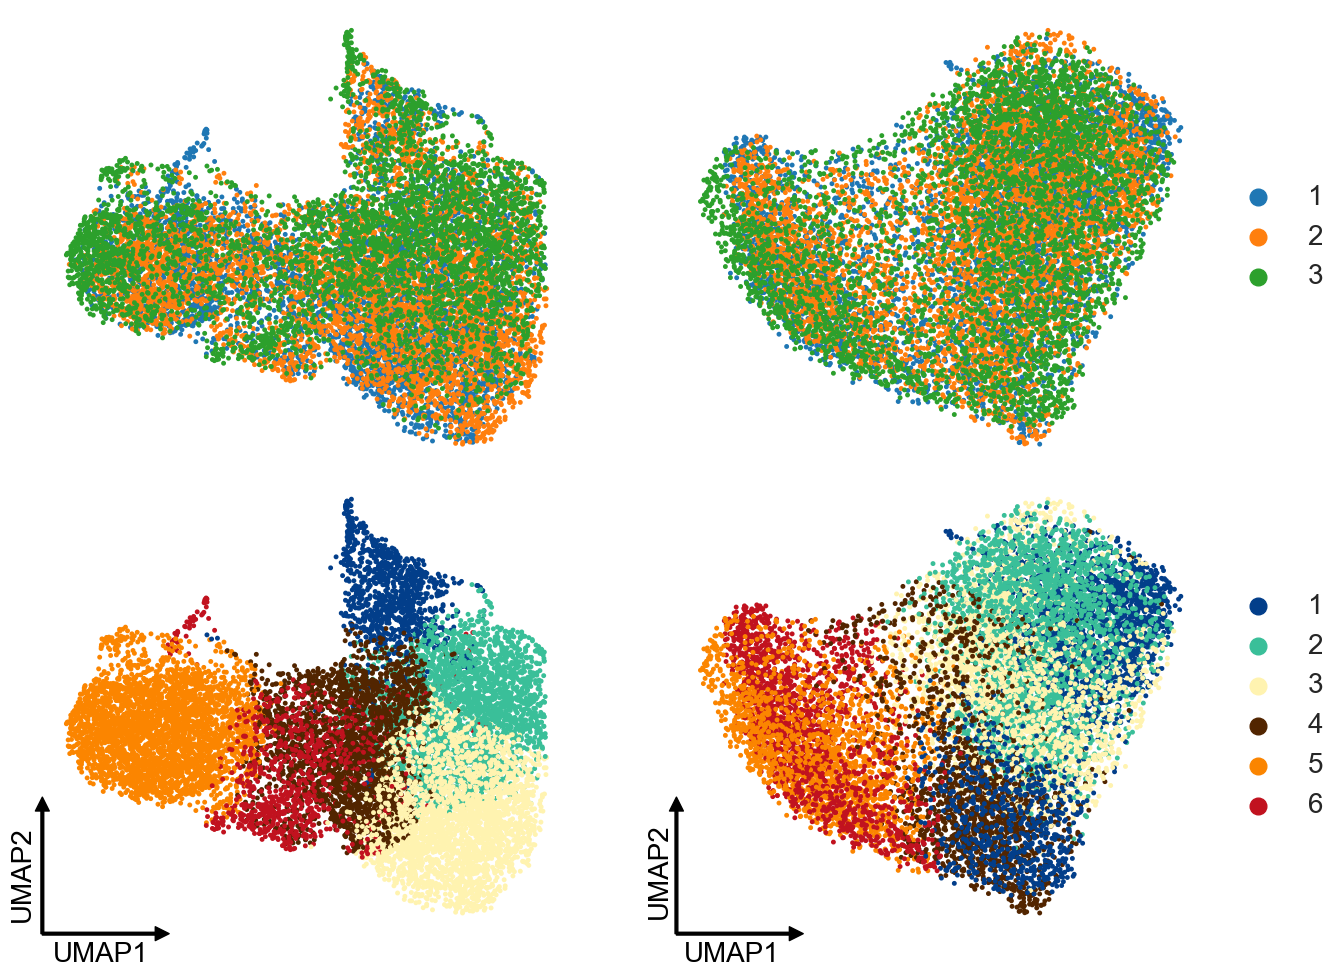

In [ ]:
import matplotlib.pyplot as plt

colors = ['#023e8a', '#3abf99', '#fff3b0', '#522500', '#fb8500', '#c1121f']
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15, 12))  # 2x2 layout

# Set font and spacing
plt.rcParams['font.size'] = 26
plt.rcParams['font.sans-serif'] = 'Arial'
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=0.03)

batch = ['1', '2', '3']

# Plot the first subplot - ADT data UMAP
sc.pl.umap(adata_ADT_all, color=['batch'], ax=ax[0, 0], show=False, s=50)
ax[0, 0].set_title('')
ax[0, 0].set_xlabel('')
ax[0, 0].set_ylabel('')
for spine in ax[0, 0].spines.values():
    spine.set_visible(False)

# Plot the second subplot - RNA data UMAP (swap positions)
sc.pl.umap(adata_RNA_all, color=['batch'], ax=ax[0, 1], show=False, s=50)
ax[0, 1].set_title('')
ax[0, 1].set_xlabel('')
ax[0, 1].set_ylabel('')
for spine in ax[0, 1].spines.values():
    spine.set_visible(False)

# Plot the third subplot - ADT data clustering UMAP (swap positions)
sc.pl.umap(adata_ADT_all, color=['clusters_mclust'], ax=ax[1, 0], show=False, palette=colors, s=50)
ax[1, 0].set_title('')
ax[1, 0].set_xlabel('')
ax[1, 0].set_ylabel('')
for spine in ax[1, 0].spines.values():
    spine.set_visible(False)

# Plot the fourth subplot - RNA data clustering UMAP
sc.pl.umap(adata_RNA_all, color=['clusters_mclust'], ax=ax[1, 1], show=False, palette=colors, s=50)
ax[1, 1].set_title('')
ax[1, 1].set_xlabel('')
ax[1, 1].set_ylabel('')
for spine in ax[1, 1].spines.values():
    spine.set_visible(False)

# Create small coordinate axes
for subplot in [ax[1, 0], ax[1, 1]]:
    subplot.annotate('', xy=(0.24, 0), xytext=(0, 0), arrowprops=dict(width=2, headwidth=10, headlength=10, color='black'), xycoords='axes fraction', textcoords='axes fraction')
    subplot.annotate('', xy=(0, 0.3), xytext=(0, 0), arrowprops=dict(width=2, headwidth=10, headlength=10, color='black'), xycoords='axes fraction', textcoords='axes fraction')

# Add text labels
ax[1, 1].text(2.5, 0.95, 'UMAP1', ha='right', va='center', fontsize=20, color='black')
ax[1, 1].text(-0.3, 2.8, 'UMAP2', ha='right', va='center', fontsize=20, color='black', rotation=90)

# Add text labels
ax[1, 0].text(-1.5, -5.6, 'UMAP1', ha='right', va='center', fontsize=20, color='black')
ax[1, 0].text(-6.3, -3, 'UMAP2', ha='right', va='center', fontsize=20, color='black', rotation=90)

# Manually add legend and set point size
for i, axi in enumerate([ax[0, 1], ax[1, 1]]):
    handles, labels = axi.get_legend_handles_labels()
    # bbox_to_anchor=(1, 0.5) places the bottom-left corner of the legend outside the top-right corner of the subplot
    # loc='center left' centers the legend relative to bbox_to_anchor
    axi.legend(handles, labels, scatterpoints=1, markerscale=2, title='', bbox_to_anchor=(1, 0.5), loc='center left', framealpha=0, fontsize=20)

# Hide legend (if any)
for subplot in [ax[0, 0], ax[1, 0]]:
    if subplot.get_legend() is not None:
        subplot.get_legend().remove()

# Save the image
plt.savefig(save_path + 'batch_effect_combined.png', bbox_inches='tight', dpi=500)
plt.savefig(save_path + 'batch_effect_combined.eps', bbox_inches='tight', dpi=500)

In [ ]:
from sklearn.neighbors import NearestNeighbors

def calculate_lisi(X, batch_labels, num_neighbors=15):
    """
    Calculate the Local Inverse Simpson Index (LISI).
    
    Parameters:
    X -- Feature matrix, where rows represent cells and columns represent features.
    batch_labels -- Batch labels for each cell.
    num_neighbors -- Number of neighbors for each cell.
    
    Returns:
    lisi_scores -- Array of LISI scores.
    """
    # Calculate the nearest neighbors for each cell
    nbrs = NearestNeighbors(n_neighbors=num_neighbors, algorithm='ball_tree').fit(X)
    distances, indices = nbrs.kneighbors(X, n_neighbors=num_neighbors)
    
    # Initialize the LISI score array
    lisi_scores = np.zeros(X.shape[0])
    
    # Calculate the LISI score for each cell
    for i in range(X.shape[0]):
        # Get the batch labels of the neighbors of the i-th cell
        neighbor_batches = batch_labels[indices[i]]
        # Get the unique batch labels
        unique_batches = np.unique(neighbor_batches)
        # Calculate the LISI score
        if len(unique_batches) > 1:
            # Calculate the inverse Simpson index
            counts = np.bincount(neighbor_batches)
            lisi_scores[i] = 1 / (np.sum((counts ** 2) / len(neighbor_batches)))
        else:
            lisi_scores[i] = 0
    
    return lisi_scores

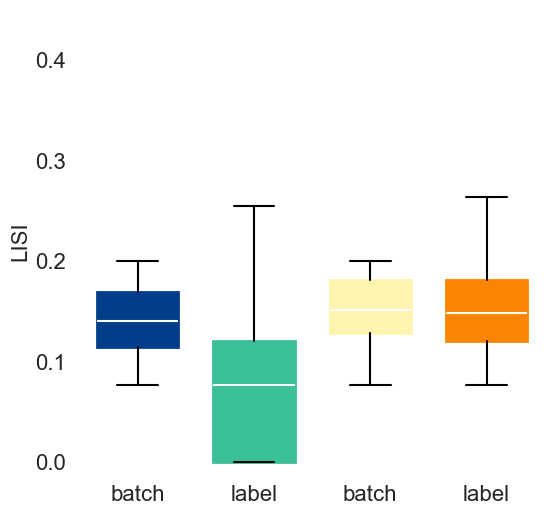

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

lisi_ADT_batch = calculate_lisi(adata_ADT_all.obsm['X_pca'], adata_ADT_all.obs['batch'])
lisi_ADT_label = calculate_lisi(adata_ADT_all.obsm['X_pca'], adata_ADT_all.obs['clusters_mclust'])
lisi_RNA_batch = calculate_lisi(adata_RNA_all.obsm['X_pca'], adata_RNA_all.obs['batch'])
lisi_RNA_label = calculate_lisi(adata_RNA_all.obsm['X_pca'], adata_RNA_all.obs['clusters_mclust'])

# Normalize LISI scores
# scaler = MinMaxScaler()
lisi_scores = np.array([lisi_ADT_batch, lisi_ADT_label, lisi_RNA_batch, lisi_RNA_label])
# normalized_lisi_scores = lisi_scores

labels = ['ADT Batch', 'ADT Label', 'RNA Batch', 'RNA Label']
colors = ['#023e8a', '#3abf99', '#fff3b0', '#fb8500', '#522500', '#c1121f']
plt.figure(figsize=(6, 6))
plt.rcParams['font.size'] = 100
plt.rcParams['font.sans-serif'] = 'Arial'


# Plot each box and specify the color
for i, (scores, label, color) in enumerate(zip(lisi_scores, labels, colors)):
    plt.boxplot(scores, positions=[i], widths=0.7, patch_artist=True,
                boxprops=dict(facecolor=color, color=color, linewidth=2),  # Set box color and line width
                whiskerprops=dict(color='black', linewidth=1.5),  # Set whisker color and line width
                capprops=dict(color='black', linewidth=1.5),  # Set cap color and line width
                medianprops=dict(color='white', linewidth=1.5),  # Set median line color and line width
                showfliers=False)  # Hide outliers

# Remove plot borders
ax = plt.gca()
for spine in ax.spines.values():
    spine.set_visible(False)
plt.xticks(ticks=range(len(labels)),labels=['batch', 'label', 'batch', 'label'], fontsize=16)
plt.yticks(fontsize=16)
plt.title('')
plt.ylim([-0.01, 0.45])
plt.xlabel('')
plt.ylabel('LISI', fontsize=16)
plt.grid(False)
# 保存图像
plt.savefig(save_path + 'LISI_num_neighbor_15.png', bbox_inches='tight', dpi=500)
plt.savefig(save_path + 'LISI_num_neighbor_15.eps', bbox_inches='tight', dpi=500)
plt.show()

In [459]:
import numpy as np
from scipy.stats import chisquare

def kBET(data, labels, k=20):
    # Get unique labels and their counts
    unique_labels = np.unique(labels)
    label_counts = np.array([np.sum(labels == label) for label in unique_labels])
    
    # Initialize the observed and expected counts arrays
    observed_counts = np.zeros((len(labels), len(unique_labels)))
    expected_counts = np.zeros((len(labels), len(unique_labels)))
    
    # Create a k-nearest neighbor graph
    from sklearn.neighbors import kneighbors_graph
    KNN_graph = kneighbors_graph(data, k, mode='connectivity', include_self=False)
    
    # Calculate the observed counts in the neighborhood of each cell
    for i in range(len(labels)):
        neighbors = KNN_graph[i].indices
        neighbor_labels = labels[neighbors]
        for j, label in enumerate(unique_labels):
            observed_counts[i, j] = np.sum(neighbor_labels == label)
    
    # Calculate the expected counts under the null hypothesis
    total_cells = label_counts.sum()
    expected_proportions = label_counts / total_cells
    expected_counts[:] = expected_proportions * observed_counts.sum(axis=1)[:, np.newaxis]
    
    # Perform the Chi-squared test for each cell
    p_values = []
    for i in range(len(labels)):
        if observed_counts[i].sum() > 0:
            # Ensure no zero divisions in expected counts
            expected_counts_i = np.where(expected_counts[i] == 0, 1, expected_counts[i])
            chi_square_stat, p_value = chisquare(f_obs=observed_counts[i], f_exp=expected_counts_i)
            p_values.append(p_value)
    
    # Calculate the average rejection rate
    average_rejection_rate = np.mean(p_values)
    
    return average_rejection_rate, p_values

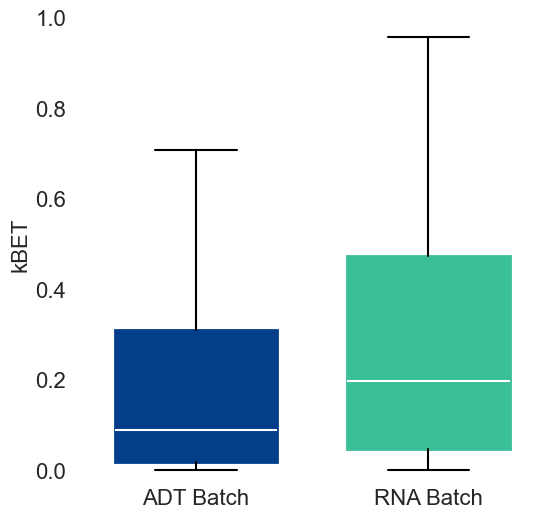

In [ ]:
def calculate_kBET(data, labels):
    kBET_result, p_values = kBET(data, labels, k=10)
    return kBET_result, p_values

# Calculate kBET values and p-values for each dataset
kBET_batch_adt, p_values_batch_adt = calculate_kBET(adata_ADT_all.obsm['X_pca'], adata_ADT_all.obs['batch'])
kBET_batch_rna, p_values_batch_rna = calculate_kBET(adata_RNA_all.obsm['X_pca'], adata_RNA_all.obs['batch'])

import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Normalize kBET p-values
scaler = MinMaxScaler()
kBET_scores = np.array([p_values_batch_adt, p_values_batch_rna])

labels = ['ADT Batch', 'RNA Batch']
colors = ['#023e8a', '#3abf99', '#fff3b0', '#fb8500', '#522500', '#c1121f']
plt.figure(figsize=(6, 6))
plt.rcParams['font.size'] = 100
plt.rcParams['font.sans-serif'] = 'Arial'

# Plot each box and specify the color
for i, (scores, label, color) in enumerate(zip(kBET_scores, labels, colors)):
    plt.boxplot(scores, positions=[i], widths=0.7, patch_artist=True,
                boxprops=dict(facecolor=color, color=color, linewidth=2),  # Set box color and line width
                whiskerprops=dict(color='black', linewidth=1.5),  # Set whisker color and line width
                capprops=dict(color='black', linewidth=1.5),  # Set cap color and line width
                medianprops=dict(color='white', linewidth=1.5),  # Set median line color and line width
                showfliers=False)  # Hide outliers

# Remove plot borders
ax = plt.gca()  # Get the current axis object
for spine in ax.spines.values():
    spine.set_visible(False)
plt.xticks(ticks=range(len(labels)), labels=['ADT Batch', 'RNA Batch'], fontsize=16)
plt.yticks(fontsize=16)
plt.title('')
plt.ylim([-0.01, 1.01])
plt.xlabel('')
plt.ylabel('kBET', fontsize=16)
plt.grid(False)
plt.show()